In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier

In [32]:
df = pd.read_csv('seeds_dataset.txt', sep='\t', on_bad_lines='skip', header=None)
df

,0,1,2,3,4,5,6,7
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


## 1.  Sử dụng thống kê mô tả, mô tả về bộ dữ liệu trên

In [33]:
df.describe()

,0,1,2,3,4,5,6,7
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


## 2.  Trực quan hóa dữ liệu với các biểu đồ box, histogram, scatter matrix, grid line 

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_856\3325129217.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,3,i)


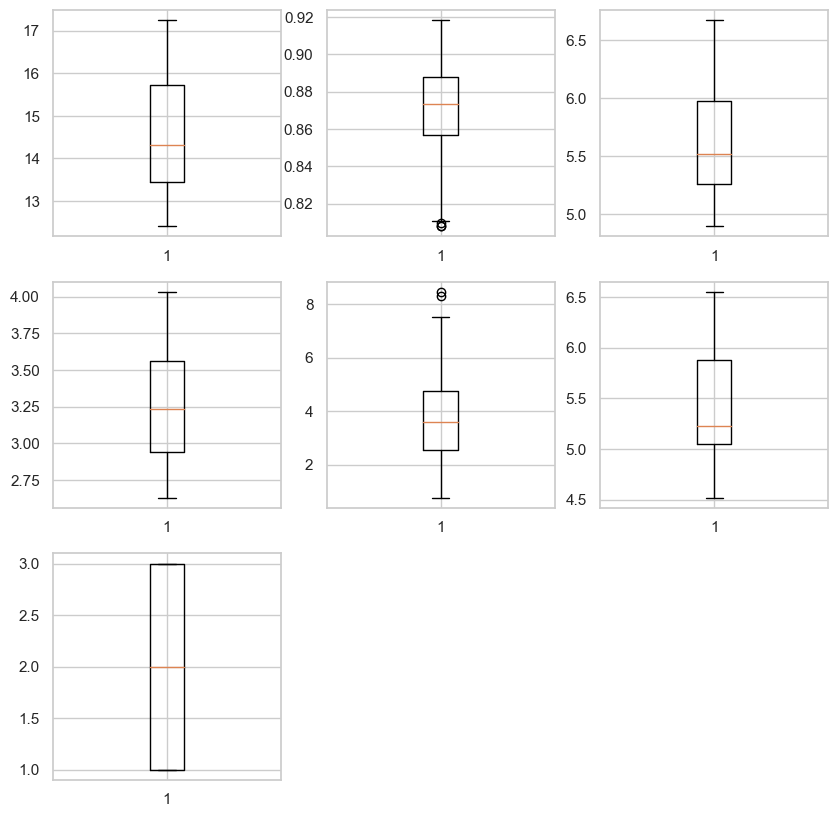

In [34]:
fig, ax = plt.subplots(figsize=(10,10))
for i in range(1,8):
    plt.subplot(3,3,i)
    plt.boxplot(df[i])
plt.show()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_856\3535634537.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,3,i)


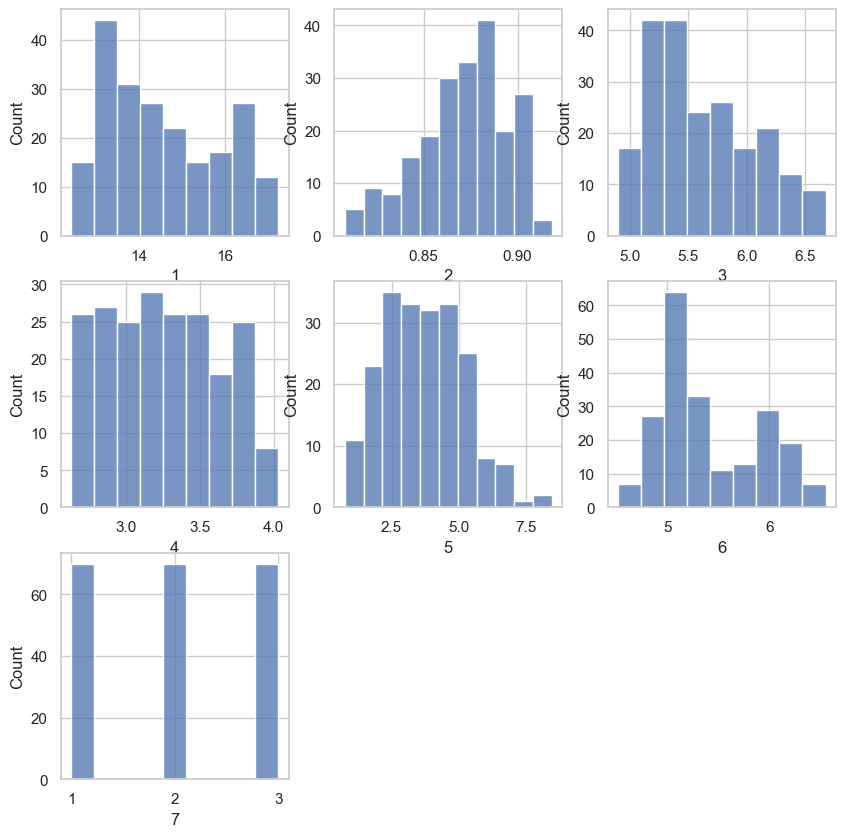

In [35]:
fig, ax = plt.subplots(figsize=(10,10))
for i in range(1,8):
    plt.subplot(3,3,i)
    sns.histplot(df[i])
plt.show()

In [36]:
sns.set_theme(style="ticks")
sns.pairplot(df, hue=7)

<Axes: xlabel='7', ylabel='1'>

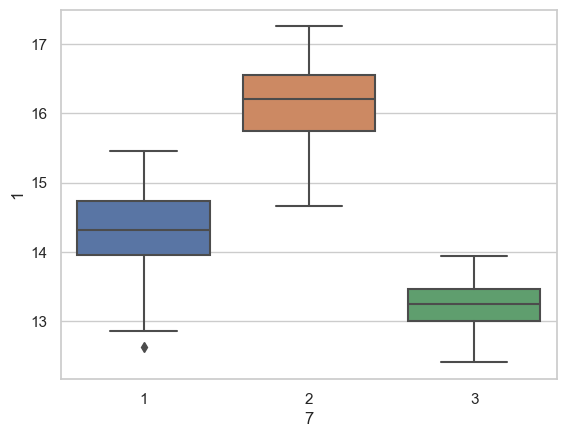

In [ ]:
sns.set(style="whitegrid")
sns.boxplot(x=7, y=1, data=df)

## 3.  Cho biết những dữ liệu còn thiếu và đề xuất cách xử lý dữ liệu thiếu đó

In [ ]:
df.isna().sum(), df.isnull().sum()

(0    0
 1    0
 2    0
 3    0
 4    0
 5    0
 6    0
 7    0
 dtype: int64,
 0    0
 1    0
 2    0
 3    0
 4    0
 5    0
 6    0
 7    0
 dtype: int64)

Tính trung bình. Bạn có thể tính trung bình của tất cả các giá trị có sẵn cho một đặc điểm và sử dụng giá trị trung bình đó để điền vào các giá trị bị thiếu. Đây là một phương pháp đơn giản và dễ thực hiện, nhưng nó có thể không chính xác nếu có xu hướng trong dữ liệu

## 4.  Chia bộ dữ liệu thành 2 phần Train/Test với các tỉ lệ nhất định

<Axes: >

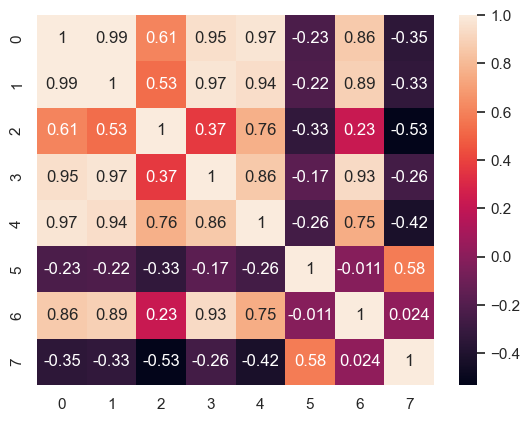

In [ ]:
sns.heatmap(df.corr(), annot=True)

In [ ]:
x = df.iloc[:,0:7]
y = df.iloc[:,7]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

## 5.  Đánh giá bộ dữ liệu với giải thuật KNN bằng phương pháp 10-Fold (k-fold)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)

kf = KFold(n_splits=10, shuffle=True, random_state=42)

scores = cross_val_score(knn, x, y, cv=kf, scoring='accuracy')

print('Accuracy score: ', scores.mean())

Accuracy score:  0.9


## 6,7,8,9,10,11.  Huấn luyện dữ liệu cho bài toán phân lớp sử dụng với các giải thuật Decision Tree, Bayes, SVM và XGBoot.

In [ ]:
class Model:
    def __init__(self, model, name):
        self.model = model
        self.name = name
        self.is_trained = False

    def fit(self, x_train, y_train, x_test, y_test):
        self.model.fit(x_train, y_train)
        y_pred = self.model.predict(x_test)
        self.accuracy = accuracy_score(y_test, y_pred)
        self.f1 = f1_score(y_test, y_pred, average='weighted')
        self.confusion_matrix = confusion_matrix(y_test, y_pred)
        self.is_trained = True

    def __repr__(self):
        if self.is_trained:
            return f"{self.name}:\n" \
                   f"Accuracy: {self.accuracy}\n" \
                   f"F1: {self.f1}\n" \
                   f"Confusion matrix: \n{self.confusion_matrix}\n"
        else:
            return f"{self.name} is not trained yet.\n"
        

models = [GaussianNB(),
          SVC(),
          XGBClassifier(),
          DecisionTreeClassifier(),
          ]

for model in models:    
    model = Model(model, model.__class__.__name__)
    y_train = LabelEncoder().fit_transform(y_train)
    y_test = LabelEncoder().fit_transform(y_test)
    model.fit(x_train, y_train, x_test, y_test)
    print(model)

GaussianNB:
Accuracy: 0.873015873015873
F1: 0.8733169871381254
Confusion matrix: 
[[16  1  3]
 [ 2 19  0]
 [ 2  0 20]]

SVC:
Accuracy: 0.8888888888888888
F1: 0.8897926628573499
Confusion matrix: 
[[17  0  3]
 [ 3 18  0]
 [ 1  0 21]]



XGBClassifier:
Accuracy: 0.9206349206349206
F1: 0.9214092140921409
Confusion matrix: 
[[18  0  2]
 [ 1 20  0]
 [ 2  0 20]]

DecisionTreeClassifier:
Accuracy: 0.8412698412698413
F1: 0.8427815570672714
Confusion matrix: 
[[16  2  2]
 [ 2 19  0]
 [ 4  0 18]]



Từ kết quả trên ta có thể thấy XGBoost cho kết quả tốt nhất

In [ ]:
import pickle
xgb = XGBClassifier()
xgb.fit(x_train, y_train)
y_pred = xgb.predict(x_test)

pickle.dump(xgb, open('XGBClassifier.pkl', 'wb'))

TypeError: 'XGBClassifier' object is not callable

In [ ]:
XGBClassifier = pickle.load(open('XGBClassifier.pkl', 'rb'))
XGBClassifier.predict(pd.DataFrame(x_test.iloc[1]).T)

array([2], dtype=int64)

In [ ]:
pd.DataFrame(x_test.iloc[1]).T

,0,1,2,3,4,5,6
172,11.27,12.97,0.8419,5.088,2.763,4.309,5.0


WEB : 